In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
BATCH_SIZE = 10

train_generator = ImageDataGenerator()

val_generator = ImageDataGenerator()

test_generator = ImageDataGenerator()

In [3]:
parent_dir = 'fruit_data_type_processed'
train_data_dir = f'{parent_dir}/Train'
test_data_dir = f'{parent_dir}/Test'
val_data_dir = f'{parent_dir}/Validation'
w,h = (224, 224)

In [4]:
traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(w, h),
                                               class_mode='binary',
#                                                classes=class_subset,
#                                                subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=42)

validgen = val_generator.flow_from_directory(val_data_dir,
                                               target_size=(w, h),
                                               class_mode='binary',
#                                                classes=class_subset,
#                                                subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(w, h),
                                             class_mode='binary',
#                                              classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

Found 13285 images belonging to 2 classes.
Found 1476 images belonging to 2 classes.
Found 3691 images belonging to 2 classes.


In [8]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(w,h,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# # Convolutional layer and maxpool layer 3
# model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))

# # Convolutional layer and maxpool layer 4
# model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(1024,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model_dir = 'Fruit-Type-Models'
save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_dir+'/cnn_model_{epoch:08d}.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True)

save_weight = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_dir+'/cnn_weight_{epoch:08d}.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history = model.fit_generator(traingen,
         steps_per_epoch = 250,
         epochs = 100,
         validation_data = validgen,
                   callbacks=[save_model, save_weight])



Epoch 1/100


/tmp/ipykernel_12893/1016774306.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(traingen,


250/250 [==============================] - ETA: 0s - loss: 225.1758 - accuracy: 0.6976

2022-07-30 16:27:46.919860: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 764411904 exceeds 10% of free system memory.
2022-07-30 16:27:48.664695: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 764411904 exceeds 10% of free system memory.
2022-07-30 16:27:50.065762: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 764411904 exceeds 10% of free system memory.
2022-07-30 16:28:10.569619: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 764411904 exceeds 10% of free system memory.


250/250 [==============================] - 141s 563ms/step - loss: 225.1758 - accuracy: 0.6976 - val_loss: 0.5768 - val_accuracy: 0.7541
Epoch 2/100
250/250 [==============================] - ETA: 0s - loss: 0.4939 - accuracy: 0.7880

2022-07-30 16:30:33.484782: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 764411904 exceeds 10% of free system memory.


250/250 [==============================] - 165s 660ms/step - loss: 0.4939 - accuracy: 0.7880 - val_loss: 0.5501 - val_accuracy: 0.7683
Epoch 3/100
250/250 [==============================] - 139s 554ms/step - loss: 1.2729 - accuracy: 0.8044 - val_loss: 0.5941 - val_accuracy: 0.7981
Epoch 4/100
250/250 [==============================] - 151s 602ms/step - loss: 0.4545 - accuracy: 0.8312 - val_loss: 0.5388 - val_accuracy: 0.7954
Epoch 5/100
250/250 [==============================] - 149s 598ms/step - loss: 0.4093 - accuracy: 0.8500 - val_loss: 0.5048 - val_accuracy: 0.8164
Epoch 6/100
250/250 [==============================] - 159s 636ms/step - loss: 0.3191 - accuracy: 0.8896 - val_loss: 0.4901 - val_accuracy: 0.8388
Epoch 7/100
250/250 [==============================] - 135s 536ms/step - loss: 0.3226 - accuracy: 0.8984 - val_loss: 0.5631 - val_accuracy: 0.8245
Epoch 8/100
250/250 [==============================] - 161s 645ms/step - loss: 0.2503 - accuracy: 0.9140 - val_loss: 0.4782 - val_

250/250 [==============================] - 182s 730ms/step - loss: 0.0607 - accuracy: 0.9784 - val_loss: 1.2158 - val_accuracy: 0.8557
Epoch 58/100
250/250 [==============================] - 186s 744ms/step - loss: 0.0924 - accuracy: 0.9724 - val_loss: 0.8967 - val_accuracy: 0.8774
Epoch 59/100
250/250 [==============================] - 190s 763ms/step - loss: 0.0653 - accuracy: 0.9780 - val_loss: 0.9682 - val_accuracy: 0.8652
Epoch 60/100
250/250 [==============================] - 192s 771ms/step - loss: 0.1828 - accuracy: 0.9576 - val_loss: 1.0787 - val_accuracy: 0.8591
Epoch 61/100
250/250 [==============================] - 196s 787ms/step - loss: 0.5132 - accuracy: 0.8581 - val_loss: 1.1695 - val_accuracy: 0.7805
Epoch 62/100
250/250 [==============================] - 193s 775ms/step - loss: 1.1258 - accuracy: 0.9056 - val_loss: 1.7675 - val_accuracy: 0.8428
Epoch 63/100
250/250 [==============================] - 201s 806ms/step - loss: 0.3265 - accuracy: 0.9508 - val_loss: 1.3089 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


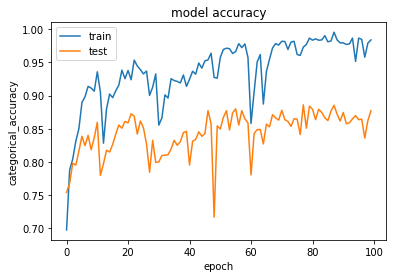

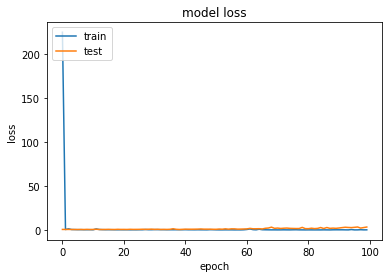

In [11]:
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()